# 0.0. IMPORTS

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
import numpy as np
import math
import pandas as pd
import inflection
from IPython.core.display import HTML

## 0.1. Helper Functions

## 0.2 Loading data

In [2]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

# merge
df_raw = pd.merge( df_sales_raw, df_store_raw, how='left', on='Store' )

# 1.0. DESCRICAO DOS DADOS

In [3]:
df1 = df_raw.copy()

### 1.1. Rename Columns

In [4]:
cols_old= ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday', 
           'StoreType', 'Assortment','CompetitionDistance', 'CompetitionOpenSinceMonth',
           'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)

cols_new = list (map( snakecase, cols_old))

# rename
df1.columns = cols_new

### 1.2. Data Dimensions

In [5]:
print( 'Number of Rows: {}'.format( df1.shape[0]))
print( 'Number of Cols: {}'.format( df1.shape[1]))

Number of Rows: 1017209
Number of Cols: 18


### 1.3. Data Types

In [6]:
df1['date'] = pd.to_datetime( df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

### 1.4. Check NA

In [7]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

### 1.5. Fillout NA

In [8]:
df1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
756711,412,4,2013-08-22,5463,429,1,0,0,1,d,c,4460.0,NaN,NaN,1,39.0,2010.0,"Jan,Apr,Jul,Oct"


In [9]:
df1['competition_distance'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0           1270.0
1            570.0
2          14130.0
3            620.0
4          29910.0
            ...   
1017204     1900.0
1017205     1880.0
1017206     9260.0
1017207      870.0
1017208     5350.0
Name: competition_distance, Length: 1017209, dtype: float64>

In [10]:
#competition_distance

df1.competition_distance.fillna(100000., inplace=True)

#competition_open_since_month

df1.competition_open_since_month.fillna(df1.date.dt.month, inplace=True)

#competition_open_since_year 

df1.competition_open_since_year.fillna(df1.date.dt.year, inplace=True)


#promo2_since_week

df1.promo2_since_week.fillna(df1.date.dt.isocalendar().week, inplace=True)

#promo2_since_year 

df1.promo2_since_year.fillna(df1.date.dt.year, inplace=True)

#promo_interval
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct',11: 'Nov', 12: 'Dec',}

df1['promo_interval'].fillna(0, inplace=True)

df1['month_map'] = df1['date'].dt.month.map( month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)



In [11]:
df1.sample(5).T

,836420,593985,46962,468547,126770
store,956,476,133,1033,776
day_of_week,3,3,5,4,4
date,2013-06-12 00:00:00,2014-01-15 00:00:00,2015-06-19 00:00:00,2014-05-08 00:00:00,2015-04-09 00:00:00
sales,3070,5263,6387,14146,3857
customers,467,639,742,1340,491
open,1,1,1,1,1
promo,0,0,1,1,0
state_holiday,0,0,0,0,0
school_holiday,0,0,0,0,1
store_type,a,d,a,a,c


In [12]:
df1.isna() .sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6. Change Types

In [13]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [14]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )

df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

In [15]:
df1.dtypes.promo2_since_week

dtype('int64')

In [16]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7. Descriptive Statistical

In [17]:
num_attributes = df1.select_dtypes(  include=['int64', 'float64'])
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'])

In [18]:
num_attributes.sample(2)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
941534,145,6,6777,1209,1,0,0,280.0,3,2013,1,45,2009,0
327528,543,4,1698,175,1,0,0,1080.0,12,2012,0,39,2014,0


In [19]:
cat_attributes.sample(2)

,state_holiday,store_type,assortment,promo_interval,month_map
416602,0,a,c,0,Jun
983509,0,d,c,0,Jan


## 1.7.1 Numerical Attributes

In [20]:
#num_attributes = df1.select_dtypes( include=['int64', 'float64'])


# Central Tendency - mean, median

ct1 = pd.DataFrame( num_attributes.apply ( np.mean)).T
ct2 = pd.DataFrame( num_attributes.apply ( np.median)).T

# Dispersion - std, min, max, range, sken, kurtosis

d1 = pd.DataFrame( num_attributes.apply ( np.std )).T
d2 = pd.DataFrame( num_attributes.apply ( min )).T
d3 = pd.DataFrame( num_attributes.apply ( max )).T
d4 = pd.DataFrame( num_attributes.apply ( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame( num_attributes.apply ( lambda x: x.skew() )).T
d6 = pd.DataFrame( num_attributes.apply ( lambda x: x.kurtosis() )).T

# concatenate

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']

In [21]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,100000.0,99980.0,5675.712376,2330.0,9085.159292,4.637208,35.287543
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


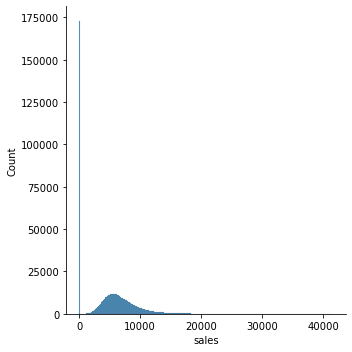

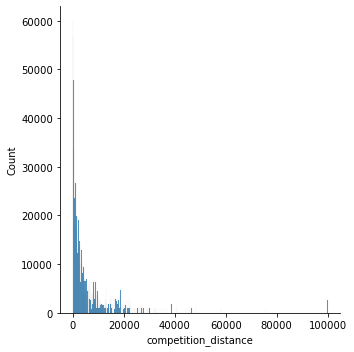

In [22]:
sns.displot( df1['sales'] )
sns.displot( df1['competition_distance'] )

## 1.7.2 Categorical Attributes

In [23]:
cat_attributes.apply( lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

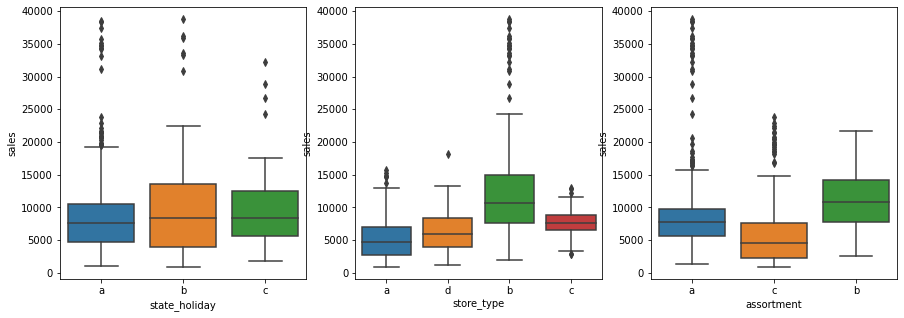

In [24]:
aux1 = df1[( df1['state_holiday'] != '0') & ( df1[ 'sales'] > 0)]

fig=plt.figure(figsize=(15,5))

plt.subplot( 1, 3, 1)
sns.boxplot( x='state_holiday', y='sales', data=aux1 )

plt.subplot( 1, 3, 2)
sns.boxplot( x='store_type', y='sales', data=aux1 )

plt.subplot( 1, 3, 3)
sns.boxplot( x='assortment', y='sales', data=aux1 )